In [1]:
import pandas as pd # Importing pandas

In [2]:
messages=pd.read_csv('SMSSpamCollection',sep='\t',names=['label','message']) # Reading CSV file and name columns

In [3]:
messages.head() # Checking first five rows

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
messages.groupby('label').describe() # Grouping messages by ham and spam

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [6]:
messages['length'] = messages['message'].apply(len) # Adding new column named length which includes length of messages

In [7]:
messages.head() # Checking head of DataFrame

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [8]:
import matplotlib.pyplot as plt # Importing matplotlib to visualize
%matplotlib inline

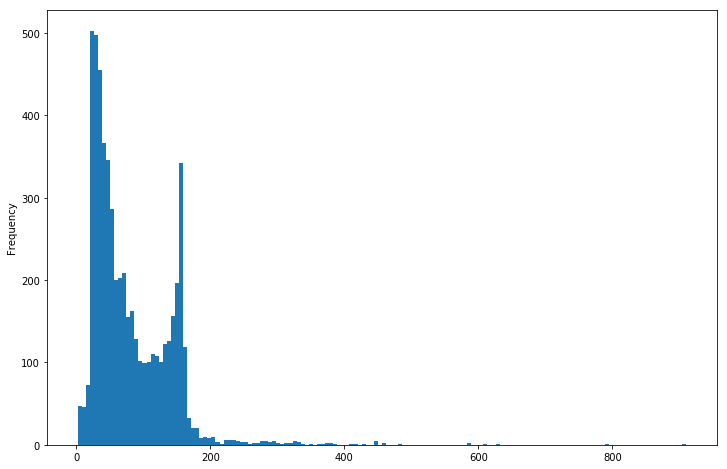

In [9]:
plt.figure(figsize=(12,8)) # Increasing figuresize
messages['length'].plot.hist(bins=150) # Plotting frequency distribution of message length 

In [10]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [11]:
messages[messages['length']==910]['message'].iloc[0] # Longest row in messages

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb47fb7c6d8>,
      dtype=object)

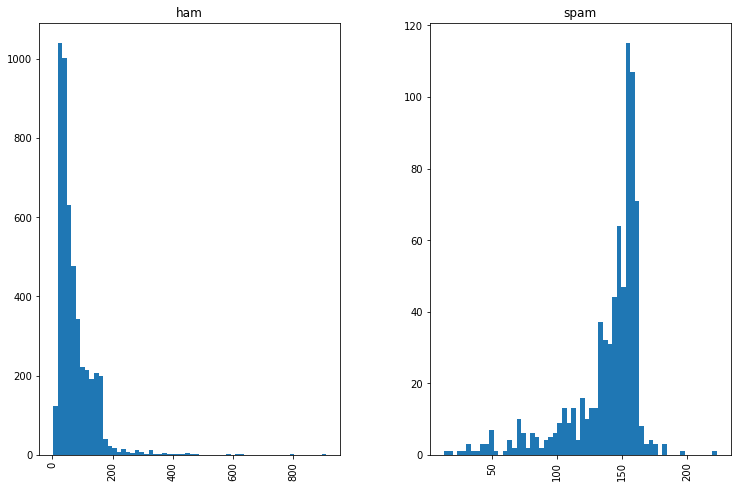

In [12]:
messages.hist(column='length',by='label',bins=60,figsize=(12,8)) # Histogram of ham and spam

In [13]:
import string # Importing string module to clean messages

In [14]:
from nltk.corpus import stopwords

In [15]:
def text_process(mess):
    """
    1. Remove punctuation
    2. Split words
    3. Remove stopwords
    4. Return list of cleaned texts
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word not in stopwords.words('english')]

In [16]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
messages["message"].head(5).apply(text_process) # Applying function to messages

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, I, dont, think, goes, usf, lives, around...
Name: message, dtype: object

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message']) # Creating bag of words

In [20]:
print(len(bow_transformer.vocabulary_))

11617


In [21]:
messages_bow = bow_transformer.transform(messages['message'])

In [22]:
print('Shape of the matrix:',messages_bow.shape) 

Shape of the matrix: (5572, 11617)


In [23]:
print(messages_bow)

  (0, 1133)	1
  (0, 1521)	1
  (0, 2113)	1
  (0, 4845)	1
  (0, 5409)	1
  (0, 5410)	1
  (0, 5961)	1
  (0, 6409)	1
  (0, 7098)	1
  (0, 7129)	1
  (0, 7747)	1
  (0, 7860)	1
  (0, 8528)	1
  (0, 9109)	1
  (0, 11157)	1
  (0, 11355)	1
  (1, 2535)	1
  (1, 3177)	1
  (1, 7893)	1
  (1, 8782)	1
  (1, 10890)	1
  (1, 11264)	1
  (2, 73)	1
  (2, 423)	1
  (2, 430)	1
  :	:
  (5568, 11610)	1
  (5569, 3349)	1
  (5569, 3852)	1
  (5569, 8444)	1
  (5569, 10391)	1
  (5570, 2362)	1
  (5570, 4109)	1
  (5570, 4700)	1
  (5570, 5247)	1
  (5570, 5443)	1
  (5570, 6474)	1
  (5570, 6891)	1
  (5570, 6991)	1
  (5570, 7176)	1
  (5570, 7479)	1
  (5570, 7586)	1
  (5570, 7992)	1
  (5570, 8612)	1
  (5570, 10107)	1
  (5570, 10979)	1
  (5570, 11198)	1
  (5571, 2472)	1
  (5571, 3553)	1
  (5571, 8540)	1
  (5571, 10840)	1


In [24]:
bow_transformer.get_feature_names()[1521]

'Cine'

In [25]:
messages_bow.nnz # non zeros

56024

In [26]:
sparcity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])) # [non zero messages/ total messages]*100
print('Sparcity:{}'.format(sparcity)) 

Sparcity:0.08655038742205227


In [27]:
from sklearn.feature_extraction.text import TfidfTransformer

In [28]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [29]:
tfidf = tfidf_transformer.transform(messages_bow)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['label'],test_size=0.3) # Splitting the model into training and testing

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
from sklearn.pipeline import Pipeline

In [34]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [35]:
pipeline.fit(msg_train,label_train) # Fitting pipeline

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x7fb4716c5d90>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=No...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [36]:
pred = pipeline.predict(msg_test) # Predicting 

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(label_test,pred)) # Checking accuracy

             precision    recall  f1-score   support

        ham       0.96      1.00      0.98      1450
       spam       0.99      0.74      0.85       222

avg / total       0.97      0.96      0.96      1672

